In [142]:
#Competition Description
#The sinking of the RMS Titanic is one of the most infamous shipwrecks in 
#history.  On April 15, 1912, during her maiden voyage, the Titanic sank after
#colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This
#sensational tragedy shocked the international community and led to better
#safety regulations for ships.
#One of the reasons that the shipwreck led to such loss of life was that there
#were not enough lifeboats for the passengers and crew. Although there was some
#element of luck involved in surviving the sinking, some groups of people were
#more likely to survive than others, such as women, children, and the
#upper-class.
#In this challenge, we ask you to complete the analysis of what sorts of people
#were likely to survive. In particular, we ask you to apply the tools of machine
#learning to predict which passengers survived the tragedy.

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [144]:
train = pd.read_csv(r'C:\Users\sonia\Music\titanic_train.csv')

In [145]:
test = pd.read_csv(r'C:\Users\sonia\Music\titanic_test.csv')

In [146]:
#checking null

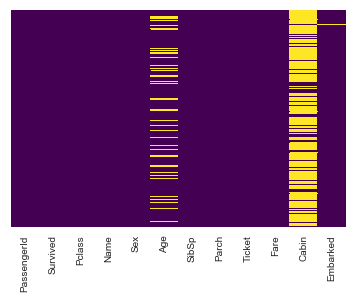

In [147]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [148]:
sns.set_style('whitegrid')

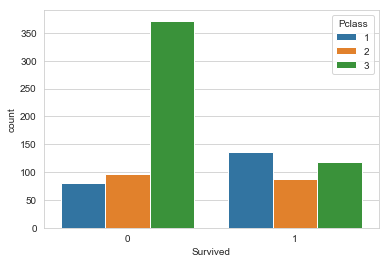

In [149]:
sns.countplot(x='Survived',hue='Pclass',data=train)

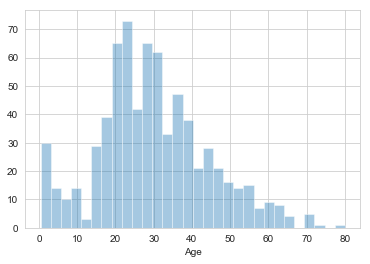

In [150]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

In [151]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


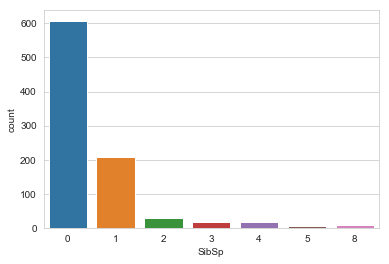

In [152]:
sns.countplot(x='SibSp',data=train)

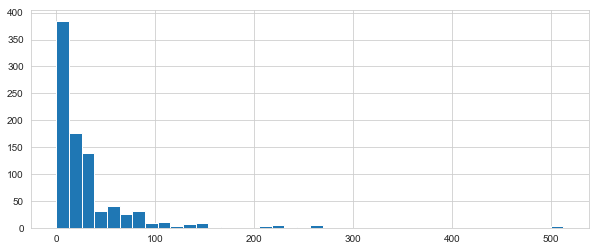

In [153]:
train['Fare'].hist(bins=40,figsize=(10,4))

In [154]:
#filling the Nan of age with average values according to Pclass

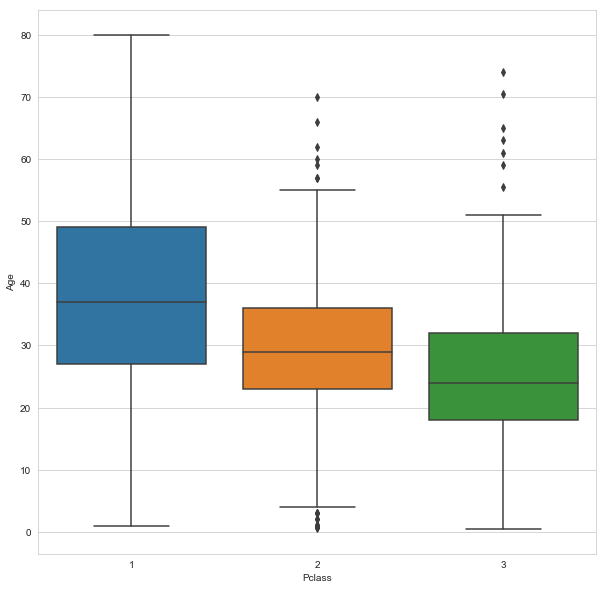

In [155]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Pclass',y='Age',data=train)

In [156]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37  #mid line of Pclass1 is approx at 37
        elif Pclass == 2:
            return 29  #mid line of Pclass2 is approx at 29
        else:
            return 24  #mid line of Pclass3 is approx at 24
    else:
        return Age

In [157]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

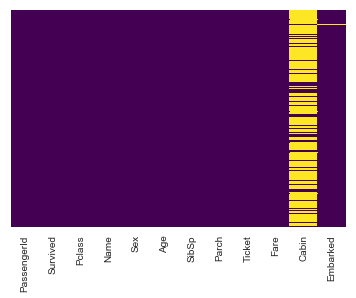

In [158]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [159]:
#removing cabin column

In [160]:
train.drop('Cabin',axis=1,inplace=True)

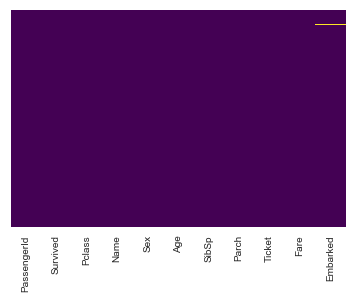

In [161]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [162]:
train.dropna(inplace=True)

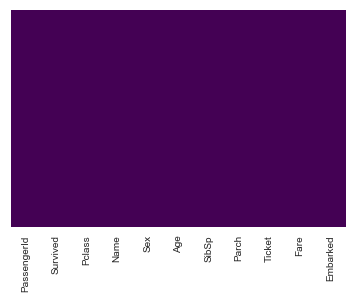

In [163]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [164]:
#creating a dummy variable as machine learning cant understand categorical
#features like in sex column or Emabarked column so he make it as 0 or 1

In [165]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [166]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [167]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [168]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [169]:
train = pd.concat([train,sex,embark],axis=1)

In [170]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [171]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [172]:
train.drop('PassengerId',axis=1,inplace=True)#because it is 1+index 

In [173]:
train.head()#perfect for machine learning algo

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [174]:
train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

In [183]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [197]:
#apply logistic regression and predict survivors

In [184]:
from sklearn.model_selection import train_test_split

In [185]:
np.array(X).shape

(889, 8)

In [186]:
np.array(y).shape

(889,)

In [187]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [188]:
from sklearn.linear_model import LogisticRegression

In [189]:
logmodel = LogisticRegression()

In [190]:
logmodel.fit(X_train,y_train)

C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [210]:
predictions = logmodel.predict(X_test)

In [211]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [198]:
from sklearn.metrics import classification_report

In [199]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

   micro avg       0.81      0.81      0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



In [200]:
from sklearn.metrics import confusion_matrix

In [201]:
confusion_matrix(y_test,predictions)

array([[148,  15],
       [ 36,  68]], dtype=int64)